<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Get-variant-count-by-allele-frequency-bin" data-toc-modified-id="Get-variant-count-by-allele-frequency-bin-2">Get variant count by allele frequency bin</a></span><ul class="toc-item"><li><span><a href="#Counts-for-AF-bins:-0.1%---1%-and->1.0%" data-toc-modified-id="Counts-for-AF-bins:-0.1%---1%-and->1.0%-2.1">Counts for AF bins: <em>0.1% - 1%</em> and <em>&gt;1.0%</em></a></span></li><li><span><a href="#Counts-for-singletons,-doubletons,-and-AF-bins:-doubletons---0.05%,-0.05%---0.1%,-0.1%---1%,-and->1%" data-toc-modified-id="Counts-for-singletons,-doubletons,-and-AF-bins:-doubletons---0.05%,-0.05%---0.1%,-0.1%---1%,-and->1%-2.2">Counts for <em>singletons</em>, <em>doubletons</em>, and AF bins: <em>doubletons - 0.05%</em>, <em>0.05% - 0.1%</em>, <em>0.1% - 1%</em>, and <em>&gt;1%</em></a></span><ul class="toc-item"><li><span><a href="#All-DRD2-variants" data-toc-modified-id="All-DRD2-variants-2.2.1">All DRD2 variants</a></span></li><li><span><a href="#All-DRD2-coding-variants" data-toc-modified-id="All-DRD2-coding-variants-2.2.2">All DRD2 coding variants</a></span></li></ul></li></ul></li><li><span><a href="#Filter-to-pLOF-variants-that-we-used-to-compute-constraint-metrics" data-toc-modified-id="Filter-to-pLOF-variants-that-we-used-to-compute-constraint-metrics-3">Filter to pLOF variants that we used to compute constraint metrics</a></span></li></ul></div>

## Import modules

In [1]:
import hail as hl

from gnomad_toolbox.analysis.general import get_variant_count_by_freq_bin
from gnomad_toolbox.filtering.variant import filter_by_intervals
from gnomad_toolbox.filtering.vep import filter_by_consequence_category, filter_to_plofs
from gnomad_toolbox.load_data import get_gnomad_release

Loading BokehJS ...

In [2]:
hl.init(backend="local")

Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.132-678e1f52b999
LOGGING: writing to /Users/jgoodric/PycharmProjects/gnomad-toolbox/gnomad_toolbox/notebooks/hail-20241210-2229-0.2.132-678e1f52b999.log


## Get variant count by allele frequency bin

The examples below show variant counts using the Table filtered to DRD2.

### Counts for AF bins: *0.1% - 1%* and *>1.0%*

In [3]:
drd_interval_ht = filter_by_intervals("chr11:113409605-113475691")
af_bin_ht = get_variant_count_by_freq_bin(ht=drd_interval_ht)
print(af_bin_ht)

{'0.1% - 1.0%': 49, '>1.0%': 28, 'AC0 - 0.1%': 2662}


### Counts for *singletons*, *doubletons*, and AF bins: *doubletons - 0.05%*, *0.05% - 0.1%*, *0.1% - 1%*, and *>1%*

#### All DRD2 variants

In [4]:
af_bin_ht = get_variant_count_by_freq_bin(
    af_cutoffs=[0.0005, 0.001, 0.01], 
    singletons=True, 
    doubletons=True, 
    ht=drd_interval_ht,
)
print(af_bin_ht)

{'0.05% - 0.1%': 11, '0.1% - 1.0%': 34, '>1.0%': 26, 'doubletons': 384, 'doubletons - 0.05%': 894, 'singletons': 1390}


#### All DRD2 coding variants

In [5]:
af_bin_ht = get_variant_count_by_freq_bin(
    af_cutoffs=[0.0005, 0.001, 0.01], 
    singletons=True, 
    doubletons=True, 
    ht=filter_by_csqs(['coding'], ht=drd_interval_ht),
)
print(af_bin_ht)

{'0.05% - 0.1%': 4, '0.1% - 1.0%': 8, '>1.0%': 4, 'doubletons': 111, 'doubletons - 0.05%': 291, 'singletons': 365}


## Filter to pLOF variants that we used to compute constraint metrics
pLOF variants meets the following requirements:
* High-confidence LOFTEE variants (without any flags),
* Only variants in the MANE Select transcript,
* PASS variants that are SNVs with MAF ≤ 0.1%, and
* Exome median depth ≥ 30 (**This is changing in v4 constraint?**)

**Note: this number should match the number of observed pLOF SNVs on the gene page of gnomAD Browser.**

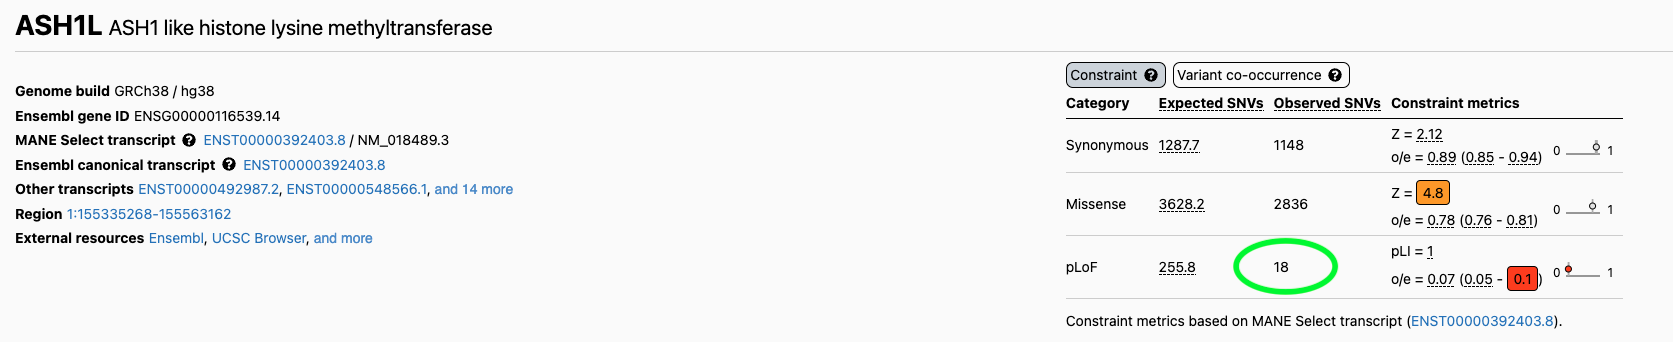

In [ ]:
filter_to_plofs('ash1l').show(-1)

Initializing Hail with default parameters...
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.132-678e1f52b999
LOGGING: writing to /Users/heqin/PycharmProjects/gnomad-toolbox/gnomad_toolbox/notebooks/hail-20250110-1057-0.2.132-678e1f52b999.log
INFO (gnomad.utils.vep 947): Filtering to canonical transcripts
INFO (gnomad.utils.vep 950): Filtering to MANE Select transcripts...
INFO (gnomad.utils.vep 953): Filtering to Ensembl transcripts...
INFO (gnomad.utils.vep 959): Filtering to genes of interest...
INFO (gnomad.utils.vep 967): Filtering to variants with additional criteria...
